In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

In [2]:
sns.set_style("white")
sns.set(font_scale=1.5)


data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [3]:
sjer_rds_path = os.path.join("data", "spatial-vector-lidar", "california", "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_rds = gpd.read_file(sjer_rds_path)

sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

print(sjer_rds.crs, sjer_aoi.crs)

EPSG:4269 EPSG:32611


In [4]:
sjer_aoi_wgs84  = sjer_aoi.to_crs(epsg=4269)

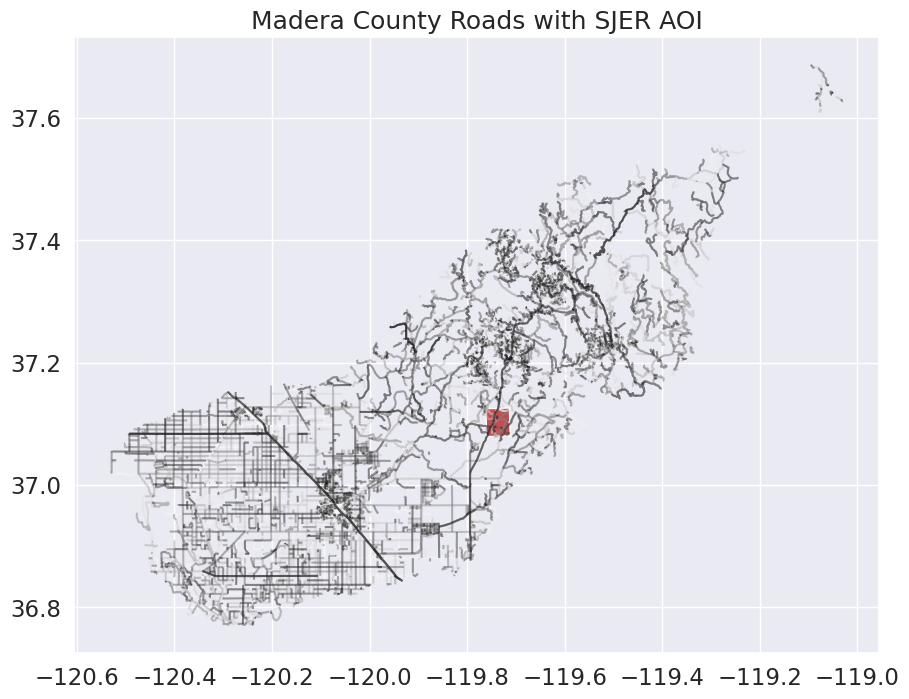

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

sjer_rds.plot(cmap='Greys',
              ax=ax,
              alpha=.5)
sjer_aoi_wgs84.plot(ax=ax,
                    markersize=10,
                    color='r')

ax.set_title("Madera County Roads with SJER AOI");

In [6]:
state_bndry_us_path = os.path.join("data", "spatial-vector-lidar", "usa", "usa-states-census-2014.shp")
state_bndry_us = gpd.read_file(state_bndry_us_path)

type(state_bndry_us)

geopandas.geodataframe.GeoDataFrame

In [7]:
state_bndry_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


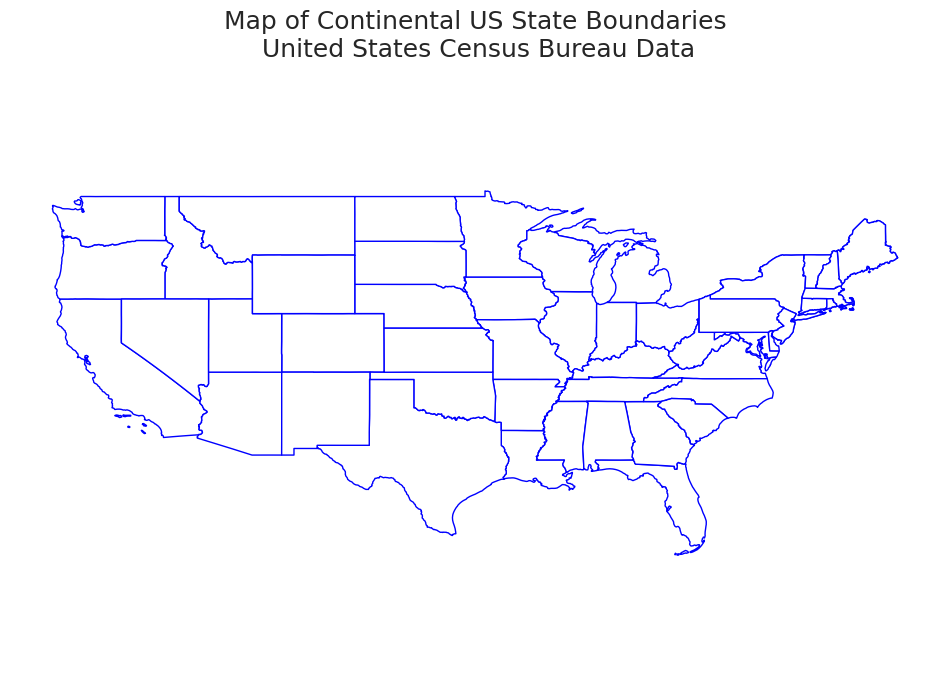

In [13]:
fig, ax = plt.subplots(figsize = (12,8))
state_bndry_us.plot(ax=ax,
                    facecolor= 'white',
                    edgecolor= 'blue')

ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

plt.axis('equal')
ax.set_axis_off()

plt.show()

In [14]:
county_bndry_us_path = os.path.join("data", "spatial-vector-lidar", 
                                       "usa", "usa-boundary-dissolved.shp")
country_bndry_us = gpd.read_file(county_bndry_us_path)

type(country_bndry_us)

geopandas.geodataframe.GeoDataFrame

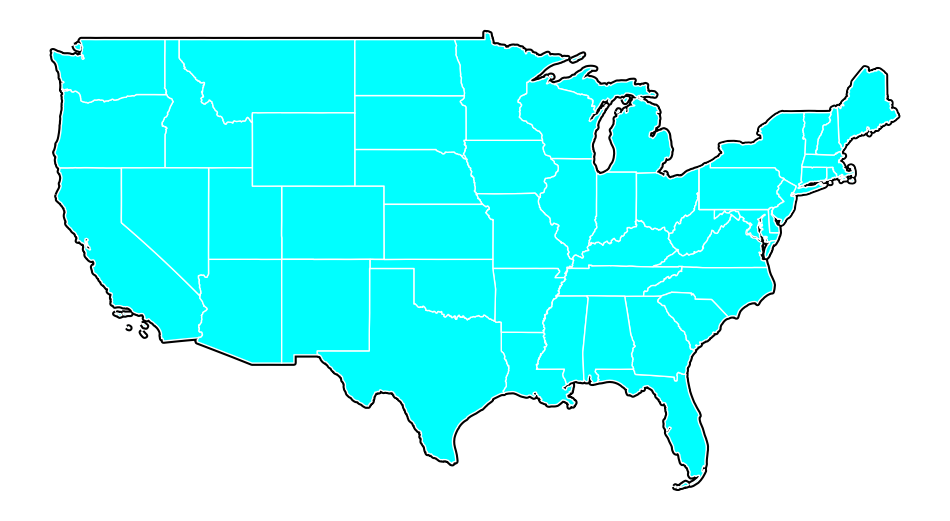

In [16]:
fig, ax = plt.subplots(figsize = (12,7))

country_bndry_us.plot(ax=ax,
                    alpha=1,
                    color= 'green',
                    edgecolor= 'black',
                    linewidth=4)

state_bndry_us.plot(ax=ax,
                    color= 'cyan',
                    edgecolor= 'white')

ax.set_axis_off()

plt.show()

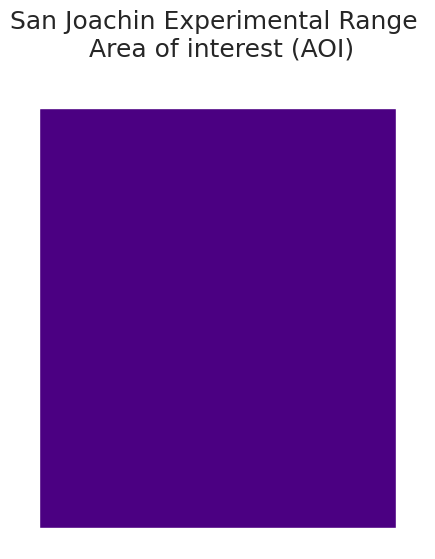

In [17]:
fig, ax = plt.subplots(figsize = (6,6))

sjer_aoi.plot(ax=ax,
              color = "indigo")
ax.set(title='San Joachin Experimental Range \n Area of interest (AOI)')

ax.set_axis_off()
plt.show()

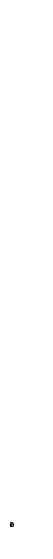

In [18]:
fig, ax = plt.subplots(figsize = (12,7))

country_bndry_us.plot(ax=ax,
                    alpha=.8,
                    color= 'white',
                    edgecolor= 'black',
                    linewidth=3)

state_bndry_us.plot(ax=ax,
                    color= 'white',
                    edgecolor= 'grey')

sjer_aoi.plot(ax=ax,
              color= 'cyan')

ax.set_axis_off()

plt.show()

In [19]:
print(sjer_aoi.crs)
print(country_bndry_us.crs)
print(state_bndry_us.crs)

EPSG:32611
EPSG:4326
EPSG:4326


In [20]:
print(sjer_aoi.total_bounds)
print(state_bndry_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]


In [22]:
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_bndry_us.crs)

print(sjer_aoi.total_bounds)
print('sjer_aoi crs:', sjer_aoi_WGS84.crs)
print('State Boundry crs:', state_bndry_us.crs)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
sjer_aoi crs: EPSG:4326
State Boundry crs: EPSG:4326


In [23]:
sjer_aoi_WGS84_2 = sjer_aoi.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

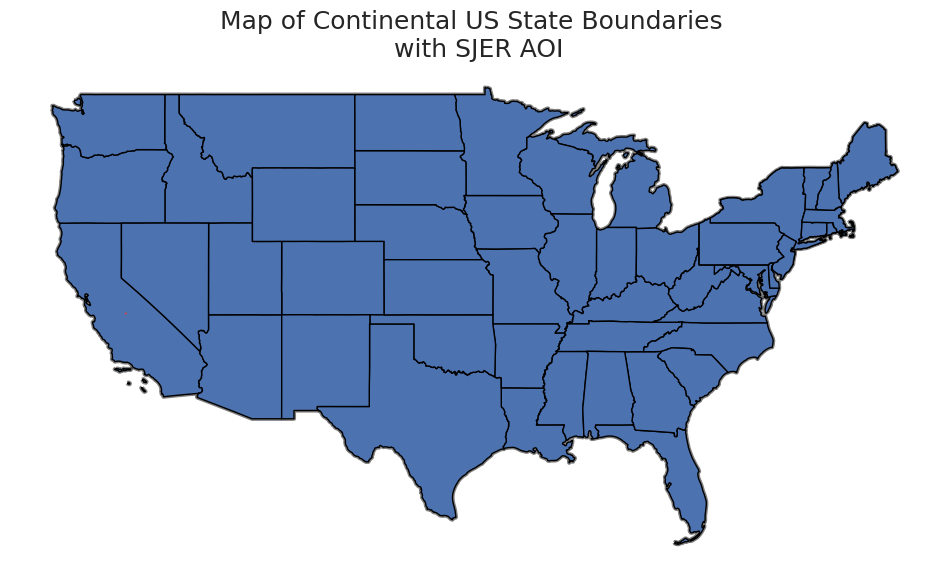

In [24]:
fig, ax = plt.subplots(figsize = (12,8))

country_bndry_us.plot(ax=ax,
                    alpha=.5,
                    color= 'white',
                    edgecolor= 'black',
                    linewidth=3)

state_bndry_us.plot(ax=ax,
                    edgecolor= 'black',
                    linewidth=1)

sjer_aoi_WGS84.plot(ax=ax,
                    color= 'springgreen',
                    edgecolor= "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off()

plt.show()

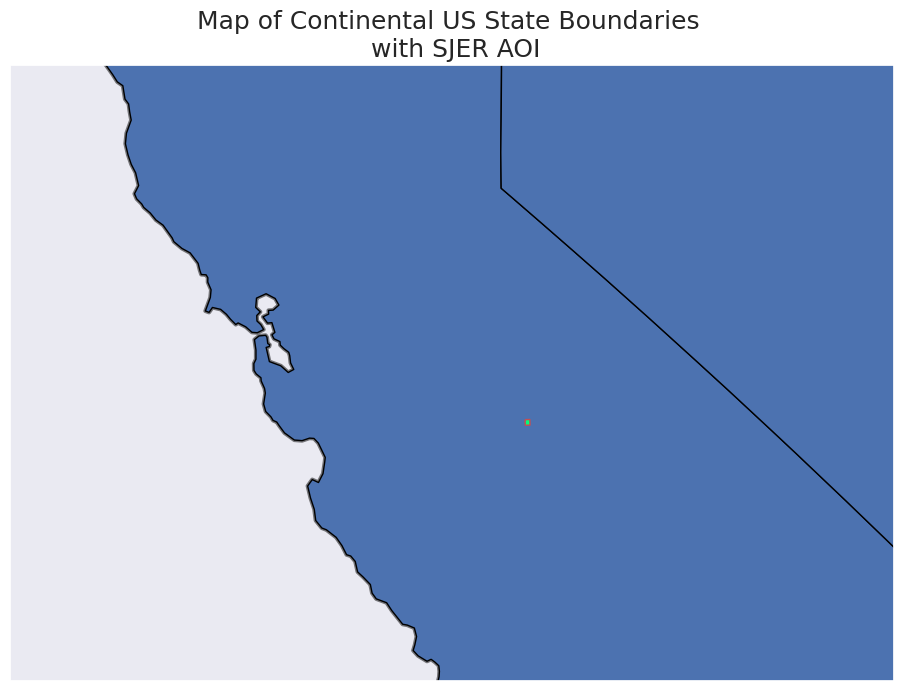

In [29]:
fig, ax = plt.subplots(figsize = (12,8))

country_bndry_us.plot(ax=ax,
                    alpha=.5,
                    color= 'white',
                    edgecolor= 'black',
                    linewidth=3)

state_bndry_us.plot(ax=ax,
                    edgecolor= 'black',
                    linewidth=1)

sjer_aoi_WGS84.plot(ax=ax,
                    color= 'springgreen',
                    edgecolor= "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI",
       xlim=[-125, -116],
       ylim=[35, 40])

ax.set( xticks= [],
       yticks=[]);

In [30]:
AOI_point = sjer_aoi_WGS84["geometry"].centroid
type(AOI_point)

/tmp/ipykernel_57270/657144365.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  AOI_point = sjer_aoi_WGS84["geometry"].centroid


geopandas.geoseries.GeoSeries

/tmp/ipykernel_57270/709454386.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sjer_aoi_WGS84["geometry"].centroid.plot();


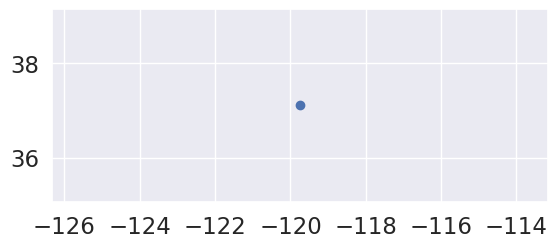

In [31]:
sjer_aoi_WGS84["geometry"].centroid.plot();

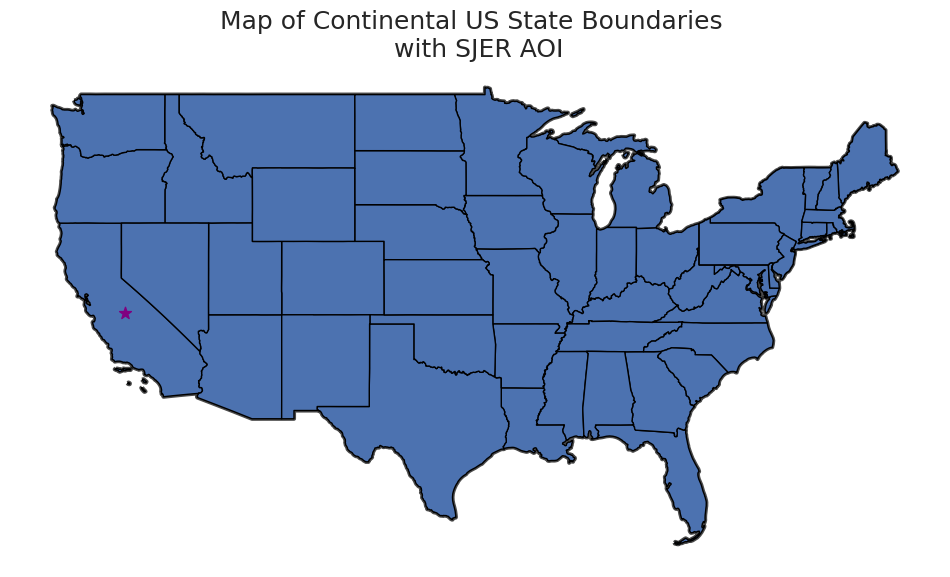

In [33]:
fig, ax = plt.subplots(figsize = (12,7))

country_bndry_us.plot(ax=ax,
                    alpha=.7,
                    color= 'white',
                    edgecolor= 'black',
                    linewidth=3)

state_bndry_us.plot(ax=ax,
                    edgecolor= 'black',
                    linewidth=1)

AOI_point.plot(ax=ax,
               markersize=80,
               color= 'purple',
               marker='*')

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off();